In [1]:
# Importação das bibliotecas necessárias
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import os

In [2]:
# Carregar os dados preparados
x_treino = np.load('x_treino.npy')  # Carrega as imagens de treinamento
y_treino = np.load('y_treino.npy')  # Carrega os rótulos de treinamento
z_treino = np.load('z_treino.npy')

x_validacao = np.load('x_validacao.npy')  # Carrega as imagens de validação
y_validacao = np.load('y_validacao.npy')  # Carrega os rótulos de validação
z_validacao = np.load('z_validacao.npy')

x_teste = np.load('x_teste.npy')  # Carrega as imagens de teste
y_teste = np.load('y_teste.npy')  # Carrega os rótulos de teste
z_teste = np.load('z_teste.npy')

print(np.shape(x_treino))
print(np.shape(x_validacao))
print(np.shape(x_teste))

(27771, 4096)
(6943, 4096)
(11548, 4096)


In [3]:
def plotar_matriz_confusao(respostas, predicoes, rotulos):
    cm = confusion_matrix(respostas, predicoes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rotulos, yticklabels=rotulos)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def plotar_relatorio_classificacao(respostas, predicoes, rotulos):
    report = classification_report(respostas, predicoes, target_names=rotulos, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    data = {metric: [report[cls][metric] for cls in rotulos] for metric in metrics}
    x = np.arange(len(rotulos))

    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * 0.2, data[metric], width=0.2, label=metric)

    plt.xticks(x + 0.2, rotulos)
    plt.ylabel('Scores')
    plt.title('Classification Metrics by Class')
    plt.legend()
    plt.show()

def plotar_curvas_roc(respostas, probabilidade, rotulos):
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(rotulos):
        fpr, tpr, _ = roc_curve(respostas == i, probabilidade[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

In [29]:
# Escalonamento dos dados
scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_validacao = scaler.transform(x_validacao)
x_teste = scaler.transform(x_teste)
print(np.shape(x_treino))
print(np.shape(x_validacao))
print(np.shape(x_teste))

(27771, 4096)
(6943, 4096)
(11548, 4096)


# MLP padrão
- hidden_layer_sizes: (100,)
- activation: 'relu'
- solver: 'adam'
- alpha: 0.0001
- batch_size: 'auto'
- learning_rate: "constant"
- learning_rate_init: 0.001
- power_t: 0.5
- max_iter: 200
- shuffle: True
- random_state: None
- tol: 1e-4
- verbose: False
- warm_state: False
- momentum: 0.9
- nesterovs_momentum: True
- early_stopping: False
- validation_fraction: 0.1
- beta_1: 0.9
- beta_2: 0.999
- epsilon: 1e-8
- n_iter_no_change: 10
- max_fun: 15000


In [5]:
mlp_padrao = MLPClassifier()

mlp_padrao.fit(x_treino, z_treino)

predicao_validacao_padrao = mlp_padrao.predict(x_validacao)
treino_acuracia_padrao = accuracy_score(z_validacao, predicao_validacao_padrao)

mae_validacao_padrao = mean_absolute_error(z_validacao, predicao_validacao_padrao)
rmse_validacao_padrao = root_mean_squared_error(z_validacao, predicao_validacao_padrao)

print("Acurácia:", treino_acuracia_padrao)
print("MAE:", mae_validacao_padrao)
print("RMSE:", rmse_validacao_padrao)

Acurácia: 0.00273656920639493
MAE: 11.668587066109751
RMSE: 13.20231671498081


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
mlp_padrao = MLPClassifier()
mlp_padrao.fit(x_treino, y_treino)

MLPClassifier()

In [7]:
predicao_validacao_padrao = mlp_padrao.predict(x_validacao)
treino_acuracia_padrao = accuracy_score(y_validacao, predicao_validacao_padrao)
print("Acurácia (modelo inicial):", treino_acuracia_padrao)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_validacao, predicao_validacao_padrao))

Acurácia (modelo inicial): 0.995823131211292
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       328
           B       1.00      1.00      1.00       342
           C       1.00      1.00      1.00       349
           D       0.99      0.99      0.99       327
           E       1.00      1.00      1.00       340
           F       0.99      1.00      0.99       340
           G       0.99      0.99      0.99       338
           I       1.00      0.99      1.00       320
           L       1.00      1.00      1.00       354
           M       1.00      0.98      0.99       312
           N       0.98      1.00      0.99       319
           O       1.00      0.98      0.99       340
           P       1.00      1.00      1.00       324
           Q       1.00      1.00      1.00       317
           R       1.00      1.00      1.00       310
           S       1.00      1.00      1.00 

In [8]:
predicao_teste_padrao = mlp_padrao.predict(x_teste)
teste_acuracia_padrao = accuracy_score(y_teste, predicao_teste_padrao)
print("Acurácia (modelo inicial):", teste_acuracia_padrao)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_padrao))

Acurácia (modelo inicial): 0.8992033252511258
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.91      0.87      0.89       579
           B       0.86      0.96      0.91       562
           C       0.94      0.92      0.93       583
           D       0.81      0.97      0.88       550
           E       0.89      0.77      0.82       574
           F       0.93      0.92      0.92       450
           G       0.95      0.74      0.83       550
           I       0.81      0.92      0.86       550
           L       0.91      0.91      0.91       550
           M       0.87      0.89      0.88       550
           N       0.93      0.80      0.86       550
           O       0.89      0.88      0.89       550
           P       0.98      1.00      0.99       550
           Q       0.86      0.98      0.92       550
           R       0.93      0.78      0.85       550
           S       0.82      0.96      0.88

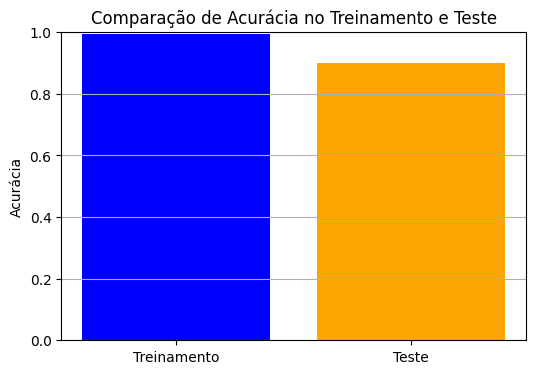

In [9]:
# Visualização dos resultados
plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [treino_acuracia_padrao, teste_acuracia_padrao], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia no Treinamento e Teste')
plt.grid(axis='y')
plt.show()

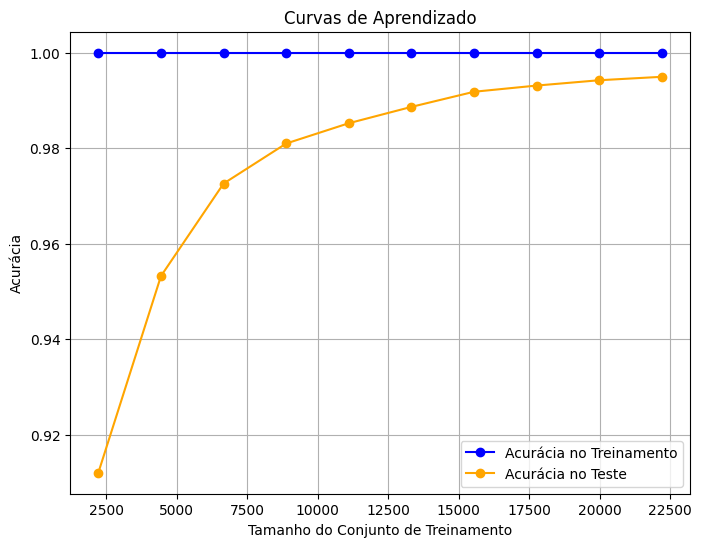

In [10]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp_padrao, x_treino, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()

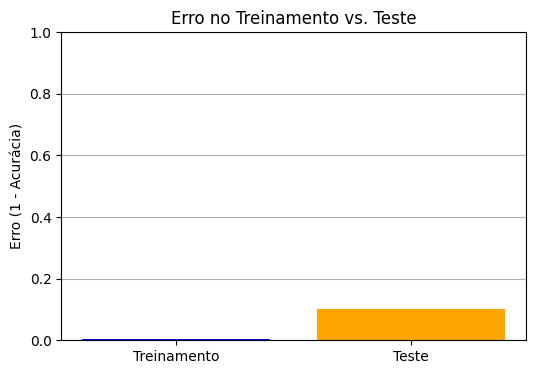

In [11]:
train_error = 1 - treino_acuracia_padrao
test_error = 1 - teste_acuracia_padrao

plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [train_error, test_error], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Erro (1 - Acurácia)')
plt.title('Erro no Treinamento vs. Teste')
plt.grid(axis='y')
plt.show()

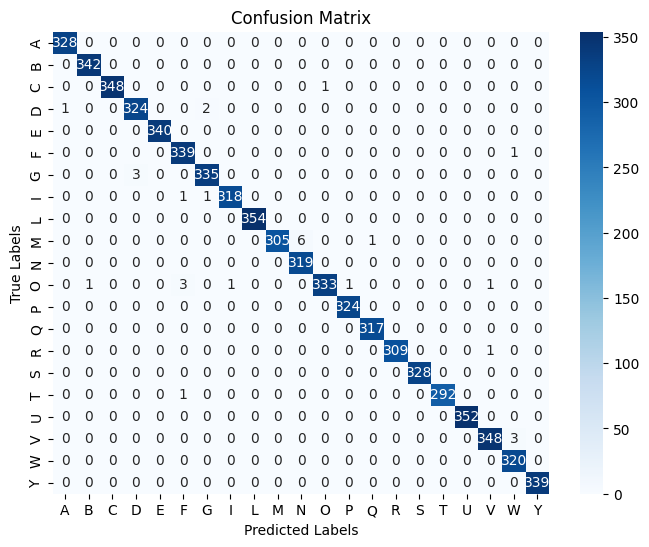

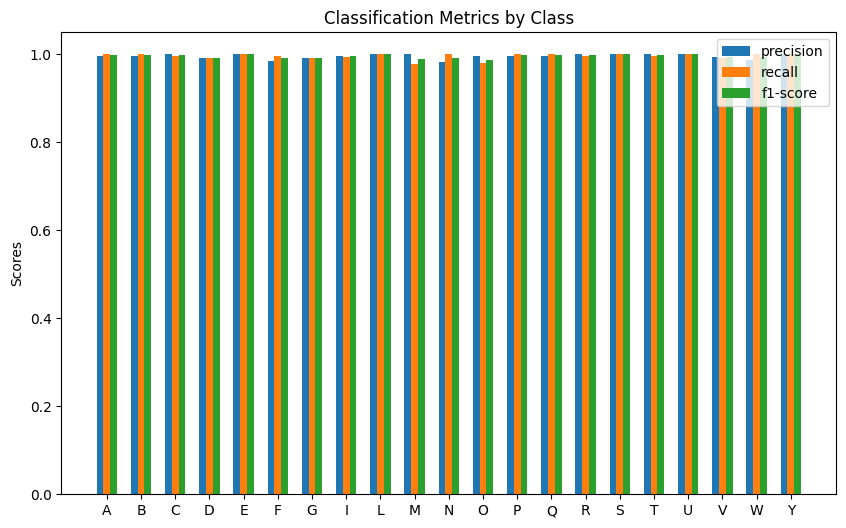

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

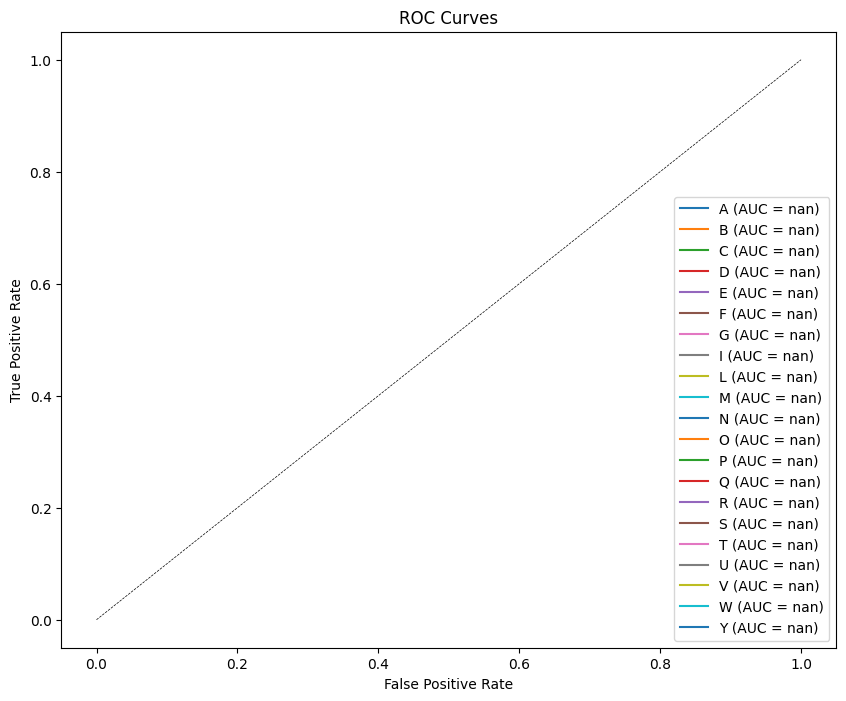

In [12]:
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_validacao = mlp_padrao.predict_proba(x_validacao)

plotar_matriz_confusao(y_validacao, predicao_validacao_padrao, letras)
plotar_relatorio_classificacao(y_validacao, predicao_validacao_padrao, letras)
plotar_curvas_roc(y_validacao, y_prob_validacao, letras)

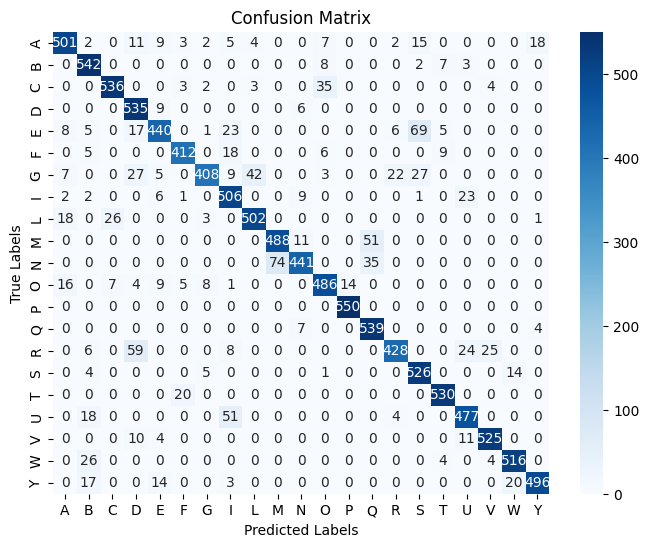

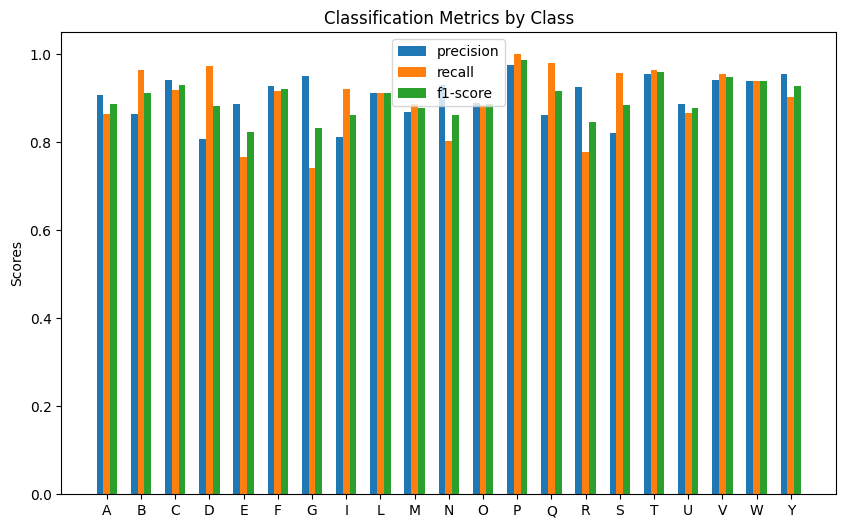

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

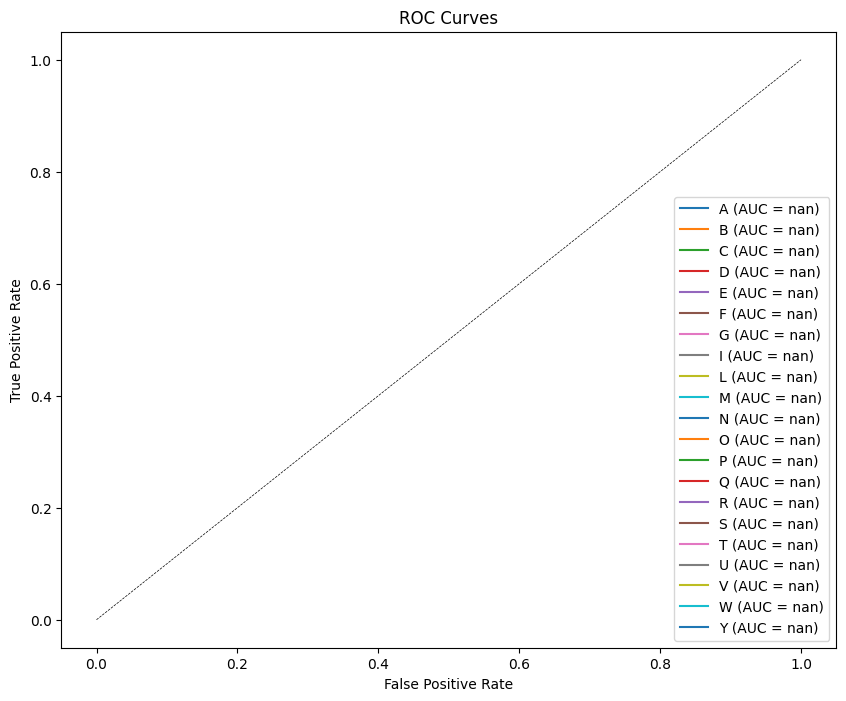

In [13]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = mlp_padrao.predict_proba(x_teste)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_padrao, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_padrao, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

In [14]:
x_validacao_ruidosa = x_validacao + np.random.normal(0, 0.1, x_validacao.shape)
x_validacao_ruidosa = np.clip(x_validacao_ruidosa, 0, 1)

y_pred_ruidosa = mlp_padrao.predict(x_validacao_ruidosa)
treino_acuracia_padrao = accuracy_score(y_validacao, y_pred_ruidosa)

print("Acurácia:", treino_acuracia_padrao)

Acurácia: 0.3113927696960968


In [15]:
x_teste_ruidosa = x_teste + np.random.normal(0, 0.1, x_teste.shape)
x_teste_ruidosa = np.clip(x_teste_ruidosa, 0, 1)

y_pred_ruidosa = mlp_padrao.predict(x_teste_ruidosa)
teste_acuracia_padrao = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_padrao)

Acurácia: 0.23908901974367855


# MLP otimizado: 
- activation: 'relu'
- hidden_layer_sizes: (100,)
- solver: 'adam'
- max_iter: 100

In [16]:
# Otimização dos hiperparâmetros com GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'max_iter': [50, 100, 200],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}
grid_search = GridSearchCV(MLPClassifier(max_iter=200), param_grid, scoring='accuracy', cv=2, verbose=2)
grid_search.fit(x_treino, y_treino)

# Resultados do modelo otimizado
best_mlp = grid_search.best_estimator_

# Exibir melhores parâmetros e melhor score
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score encontrado:", grid_search.best_score_)



Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50, solver=adam; total time=  55.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50, solver=adam; total time= 1.1min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50, solver=sgd; total time=  50.3s


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50, solver=sgd; total time=  53.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=100, solver=adam; total time=  57.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=100, solver=adam; total time=  49.0s


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=100, solver=sgd; total time= 1.5min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=100, solver=sgd; total time= 1.5min
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=  44.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=  49.9s


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time= 2.9min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time= 3.7min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam; total time= 1.4min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam; total time= 1.3min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=sgd; total time= 1.3min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=sgd; total time= 1.2min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam; total time= 1.1min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd; total time= 2.3min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd; total time= 2.3min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=  59.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time= 4.5min
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time= 4.5min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50, solver=adam; total time=  51.3s


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50, solver=adam; total time=  50.6s


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50, solver=sgd; total time=  42.9s


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50, solver=sgd; total time=  45.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=100, solver=adam; total time= 1.4min
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=100, solver=adam; total time= 1.1min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=100, solver=sgd; total time= 1.6min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=100, solver=sgd; total time= 1.5min
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time= 1.2min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time= 3.2min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time= 3.3min
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam; total time= 1.6min
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam; total time= 1.8min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=sgd; total time= 1.3min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=sgd; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam; total time= 1.6min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=sgd; total time= 2.6min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=sgd; total time= 2.6min
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time= 1.8min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time= 5.4min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time= 4.9min
Melhores parâmetros encontrados: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 100, 'solver': 'adam'}
Melhor score encontrado: 0.9906737153002294


In [18]:
# Criação e treinamento do modelo MLP
mlp_otimizado = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42, solver='adam', activation='relu')
mlp_otimizado.fit(x_treino, y_treino)
#Melhores parâmetros encontrados: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 100, 'solver': 'adam'}
#Melhor score encontrado: 0.9906737153002294

MLPClassifier(max_iter=100, random_state=42)

In [19]:
predicao_validacao_otimizado = mlp_otimizado.predict(x_validacao)
treino_acuracia_otimizado = accuracy_score(y_validacao, predicao_validacao_otimizado)
print("Acurácia (modelo inicial):", treino_acuracia_otimizado)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_validacao, predicao_validacao_otimizado))

Acurácia (modelo inicial): 0.9955350712948293
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.99      1.00      1.00       328
           B       1.00      0.99      1.00       342
           C       1.00      1.00      1.00       349
           D       0.99      0.99      0.99       327
           E       1.00      1.00      1.00       340
           F       0.99      1.00      0.99       340
           G       0.99      0.99      0.99       338
           I       0.99      1.00      1.00       320
           L       1.00      1.00      1.00       354
           M       1.00      0.99      0.99       312
           N       0.99      1.00      1.00       319
           O       1.00      0.98      0.99       340
           P       1.00      1.00      1.00       324
           Q       1.00      1.00      1.00       317
           R       0.99      1.00      1.00       310
           S       1.00      1.00      1.00

In [20]:
predicao_teste_otimizado = mlp_otimizado.predict(x_teste)
teste_acuracia_otimizado = accuracy_score(y_teste, predicao_teste_otimizado)
print("Acurácia (modelo inicial):", teste_acuracia_otimizado)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_otimizado))

Acurácia (modelo inicial): 0.8996363006581226
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.89      0.87      0.88       579
           B       0.98      0.96      0.97       562
           C       0.98      0.92      0.95       583
           D       0.83      0.98      0.90       550
           E       0.88      0.81      0.84       574
           F       0.90      0.95      0.92       450
           G       0.89      0.76      0.82       550
           I       0.74      0.91      0.82       550
           L       0.88      0.87      0.88       550
           M       0.86      0.85      0.85       550
           N       0.91      0.82      0.86       550
           O       0.86      0.91      0.89       550
           P       0.98      1.00      0.99       550
           Q       0.89      0.99      0.94       550
           R       0.90      0.79      0.84       550
           S       0.92      0.94      0.93

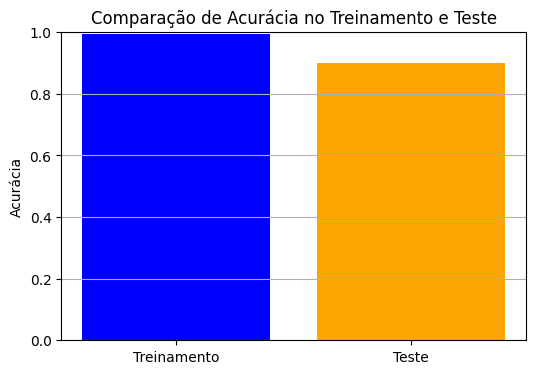

In [21]:
# Visualização dos resultados
plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [treino_acuracia_otimizado, teste_acuracia_otimizado], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia no Treinamento e Teste')
plt.grid(axis='y')
plt.show()

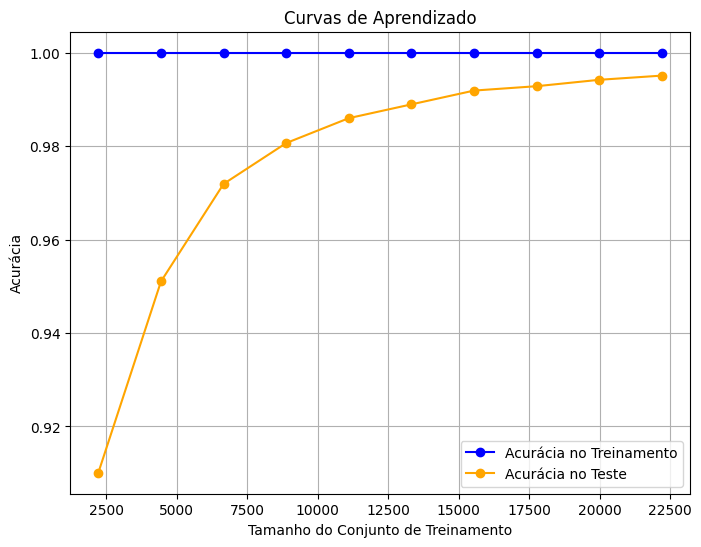

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp_otimizado, x_treino, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()

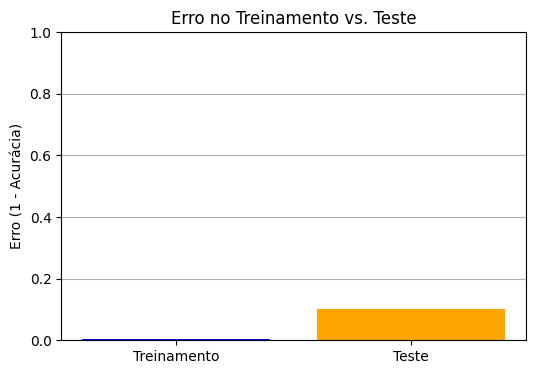

In [23]:
train_error = 1 - treino_acuracia_otimizado
test_error = 1 - teste_acuracia_otimizado

plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [train_error, test_error], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Erro (1 - Acurácia)')
plt.title('Erro no Treinamento vs. Teste')
plt.grid(axis='y')
plt.show()

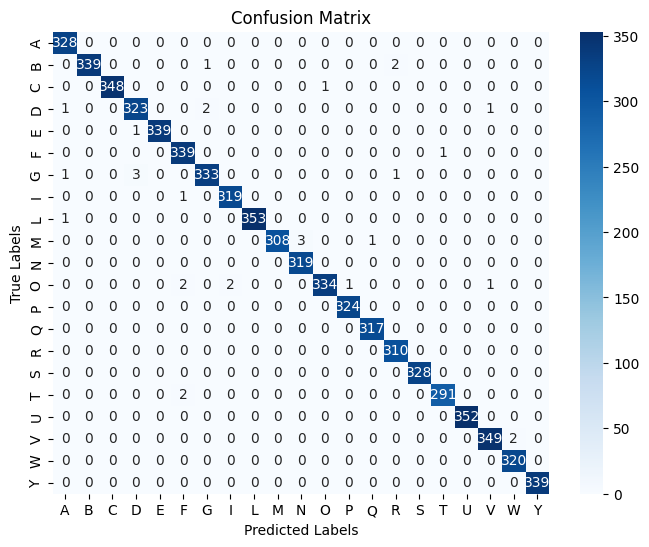

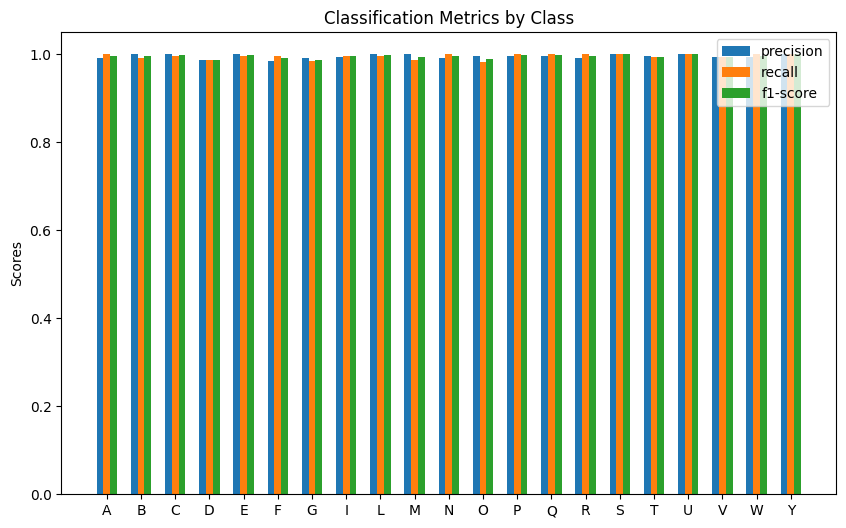

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

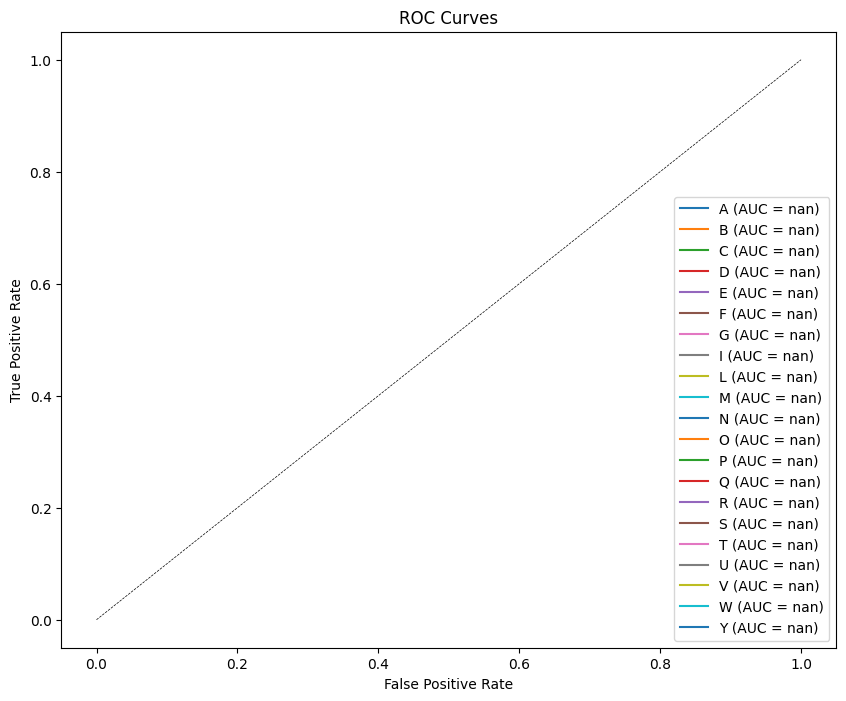

In [24]:
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_validacao = mlp_otimizado.predict_proba(x_validacao)

plotar_matriz_confusao(y_validacao, predicao_validacao_otimizado, letras)
plotar_relatorio_classificacao(y_validacao, predicao_validacao_otimizado, letras)
plotar_curvas_roc(y_validacao, y_prob_validacao, letras)

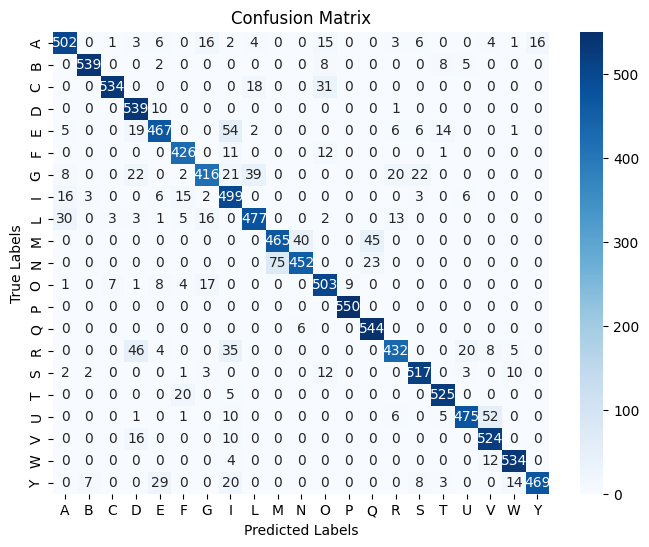

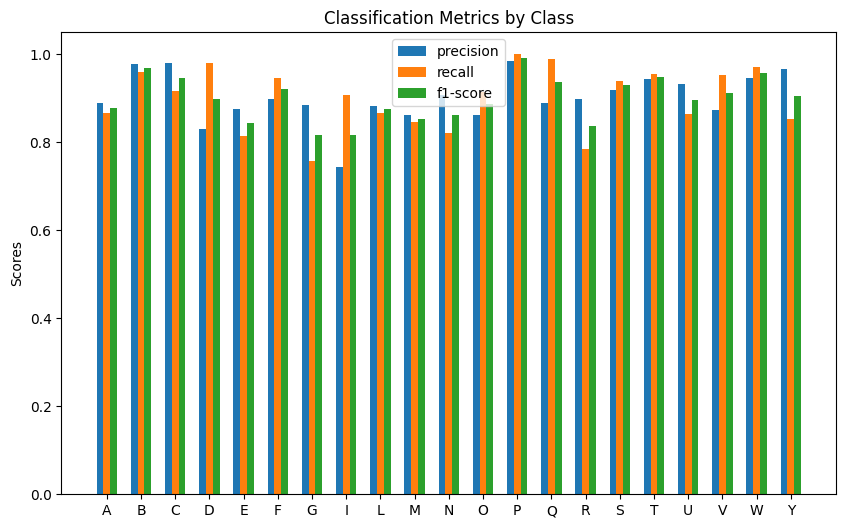

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

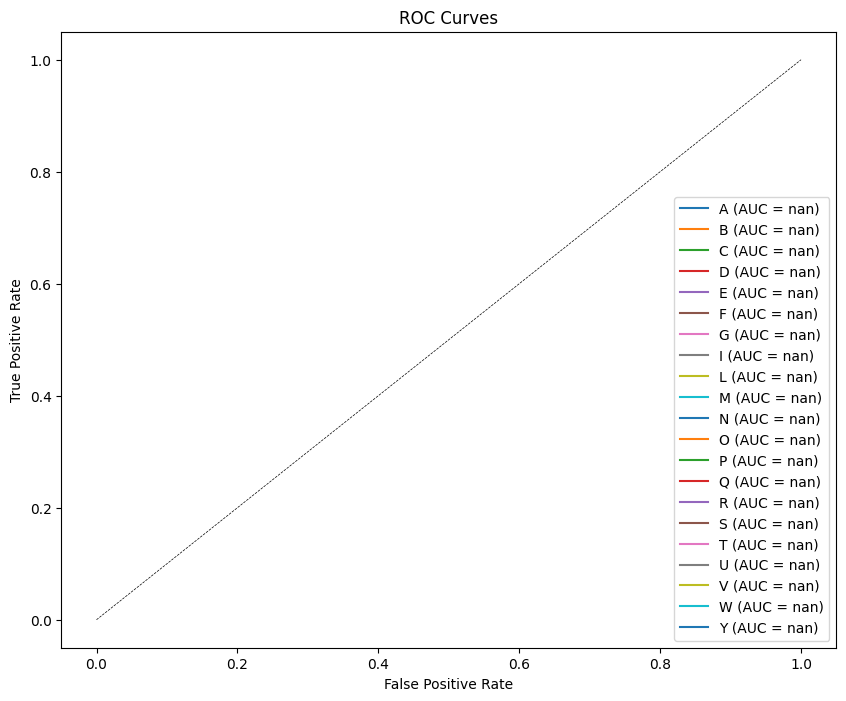

In [25]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = mlp_otimizado.predict_proba(x_teste)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_otimizado, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_otimizado, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

In [26]:
x_validacao_ruidosa = x_validacao + np.random.normal(0, 0.1, x_validacao.shape)
x_validacao_ruidosa = np.clip(x_validacao_ruidosa, 0, 1)

y_pred_ruidosa = mlp_otimizado.predict(x_validacao_ruidosa)
treino_acuracia_padrao = accuracy_score(y_validacao, y_pred_ruidosa)

print("Acurácia:", treino_acuracia_padrao)

Acurácia: 0.37375774161025493


In [27]:
x_teste_ruidosa = x_teste + np.random.normal(0, 0.1, x_teste.shape)
x_teste_ruidosa = np.clip(x_teste_ruidosa, 0, 1)

y_pred_ruidosa = mlp_otimizado.predict(x_teste_ruidosa)
teste_acuracia_padrao = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_padrao)

Acurácia: 0.30810529961898164


In [30]:
from sklearn.decomposition import PCA

# Definir o PCA para reter 95% da variância dos dados
pca = PCA(n_components=0.95)  # Retém 95% da variância
x_treino_pca = pca.fit_transform(x_treino)
x_validacao_pca = pca.transform(x_validacao)
x_teste_pca = pca.transform(x_teste)

print("TREINAMENTO")
print(f"Dimensões originais: {np.shape(x_treino)}")
print(f"Dimensões após PCA: {np.shape(x_treino_pca)}")
print("VALIDAÇÃO")
print(f"Dimensões originais: {np.shape(x_validacao)}")
print(f"Dimensões após PCA: {np.shape(x_validacao_pca)}")
print("TESTE")
print(f"Dimensões originais: {np.shape(x_teste)}")
print(f"Dimensões após PCA: {np.shape(x_teste_pca)}")

TREINAMENTO
Dimensões originais: (27771, 4096)
Dimensões após PCA: (27771, 199)
VALIDAÇÃO
Dimensões originais: (6943, 4096)
Dimensões após PCA: (6943, 199)
TESTE
Dimensões originais: (11548, 4096)
Dimensões após PCA: (11548, 199)


# MLP OTIMIZADO COM PCA

In [43]:
# Criação e treinamento do modelo MLP
mlp_otimizado_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42, solver='adam', activation='relu')
mlp_otimizado_pca.fit(x_treino_pca, y_treino)
#Melhores parâmetros encontrados: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 100, 'solver': 'adam'}


MLPClassifier(max_iter=100, random_state=42)

In [44]:
predicao_teste_otimizado_pca = mlp_otimizado_pca.predict(x_teste_pca)
teste_acuracia_otimizado_pca = accuracy_score(y_teste, predicao_teste_otimizado_pca)
print("Acurácia (modelo inicial):", teste_acuracia_otimizado_pca)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_otimizado_pca))

Acurácia (modelo inicial): 0.8706269483893315
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.88      0.86      0.87       579
           B       0.84      0.96      0.90       562
           C       0.97      0.90      0.93       583
           D       0.80      0.99      0.88       550
           E       0.87      0.75      0.81       574
           F       0.82      0.89      0.85       450
           G       0.86      0.73      0.79       550
           I       0.83      0.89      0.86       550
           L       0.89      0.88      0.88       550
           M       0.88      0.85      0.86       550
           N       0.81      0.75      0.78       550
           O       0.85      0.88      0.86       550
           P       0.99      1.00      0.99       550
           Q       0.76      0.85      0.80       550
           R       0.90      0.76      0.82       550
           S       0.94      0.90      0.92

In [45]:
x_teste_ruidosa_pca = x_teste_pca + np.random.normal(0, 0.1, x_teste_pca.shape)
x_teste_ruidosa_pca = np.clip(x_teste_ruidosa_pca, 0, 1)

y_pred_ruidosa = mlp_otimizado_pca.predict(x_teste_ruidosa_pca)
teste_acuracia_otimizado_pca = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_otimizado_pca)

Acurácia: 0.19501212331139592


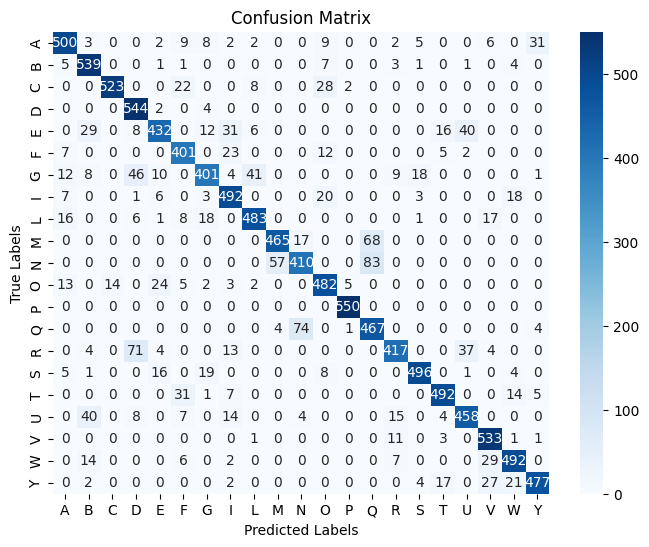

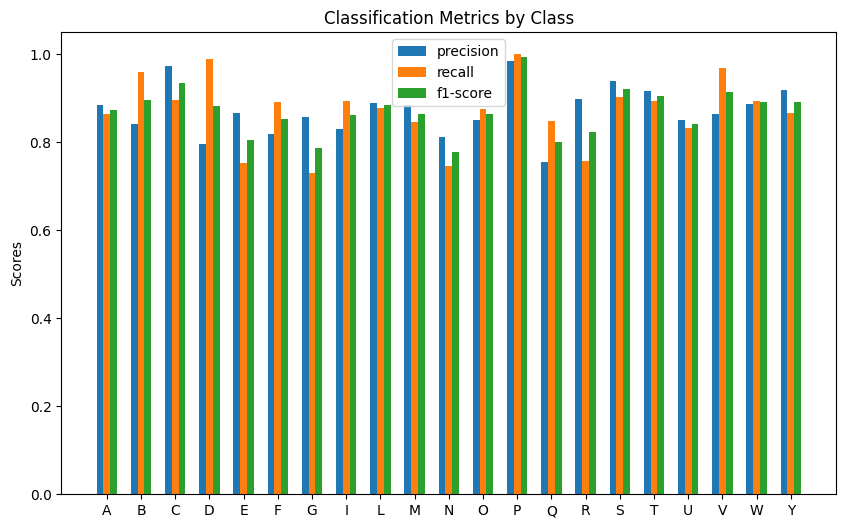

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

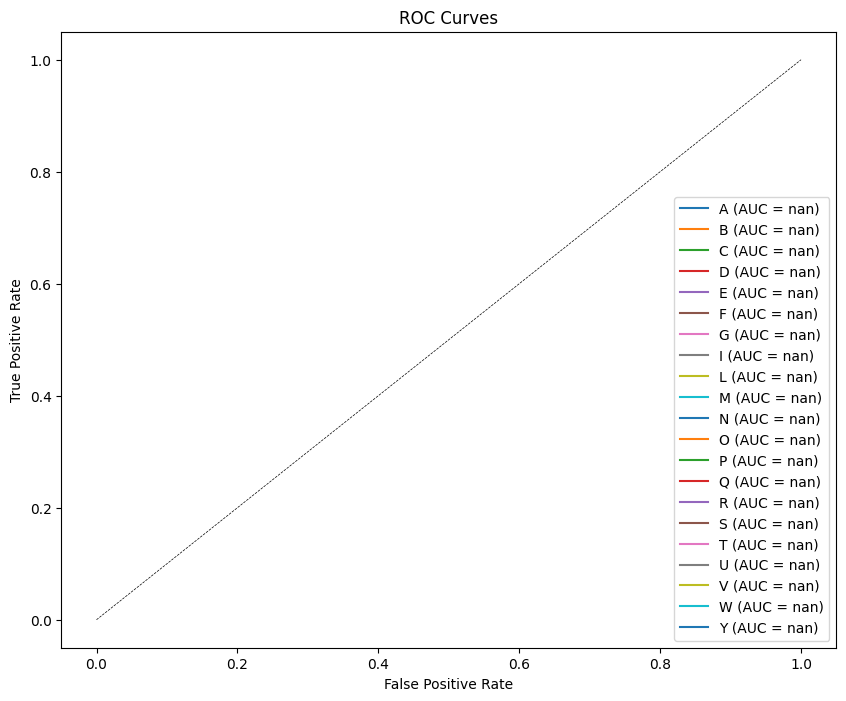

In [46]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = mlp_otimizado_pca.predict_proba(x_teste_pca)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_otimizado_pca, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_otimizado_pca, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

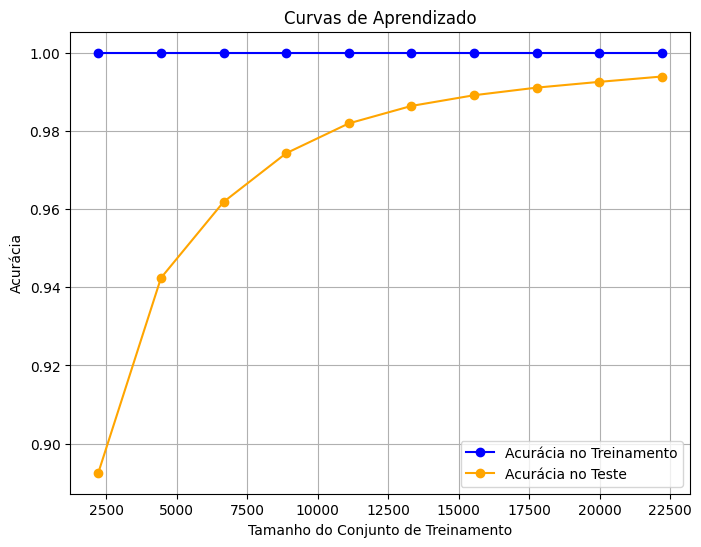

In [47]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp_otimizado_pca, x_treino_pca, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()

# MLP padrão com PCA

In [48]:
# Criação e treinamento do modelo MLP
mlp_padrao_pca = MLPClassifier(random_state=42)
mlp_padrao_pca.fit(x_treino_pca, y_treino)
#Melhores parâmetros encontrados: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 100, 'solver': 'adam'}

MLPClassifier(random_state=42)

In [49]:
predicao_teste_padrao_pca = mlp_padrao_pca.predict(x_teste_pca)
teste_acuracia_padrao_pca = accuracy_score(y_teste, predicao_teste_padrao_pca)
print("Acurácia (modelo inicial):", teste_acuracia_padrao_pca)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_padrao_pca))

Acurácia (modelo inicial): 0.8706269483893315
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.88      0.86      0.87       579
           B       0.84      0.96      0.90       562
           C       0.97      0.90      0.93       583
           D       0.80      0.99      0.88       550
           E       0.87      0.75      0.81       574
           F       0.82      0.89      0.85       450
           G       0.86      0.73      0.79       550
           I       0.83      0.89      0.86       550
           L       0.89      0.88      0.88       550
           M       0.88      0.85      0.86       550
           N       0.81      0.75      0.78       550
           O       0.85      0.88      0.86       550
           P       0.99      1.00      0.99       550
           Q       0.76      0.85      0.80       550
           R       0.90      0.76      0.82       550
           S       0.94      0.90      0.92

In [50]:
x_teste_ruidosa_pca = x_teste_pca + np.random.normal(0, 0.1, x_teste_pca.shape)
x_teste_ruidosa_pca = np.clip(x_teste_ruidosa_pca, 0, 1)

y_pred_ruidosa = mlp_padrao_pca.predict(x_teste_ruidosa_pca)
teste_acuracia_padrao_pca = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_padrao_pca)

Acurácia: 0.1929338413578109


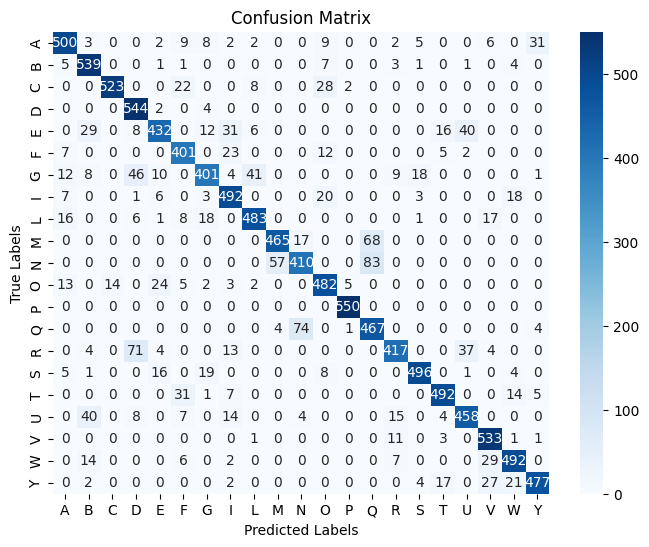

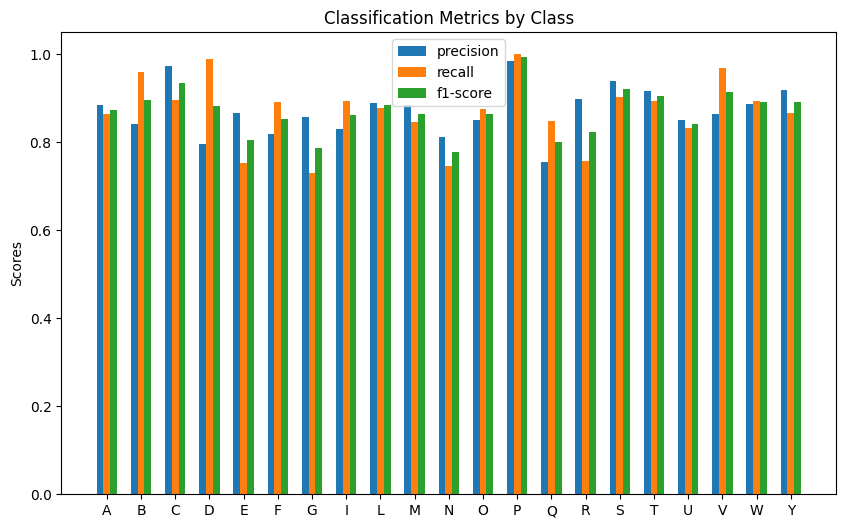

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

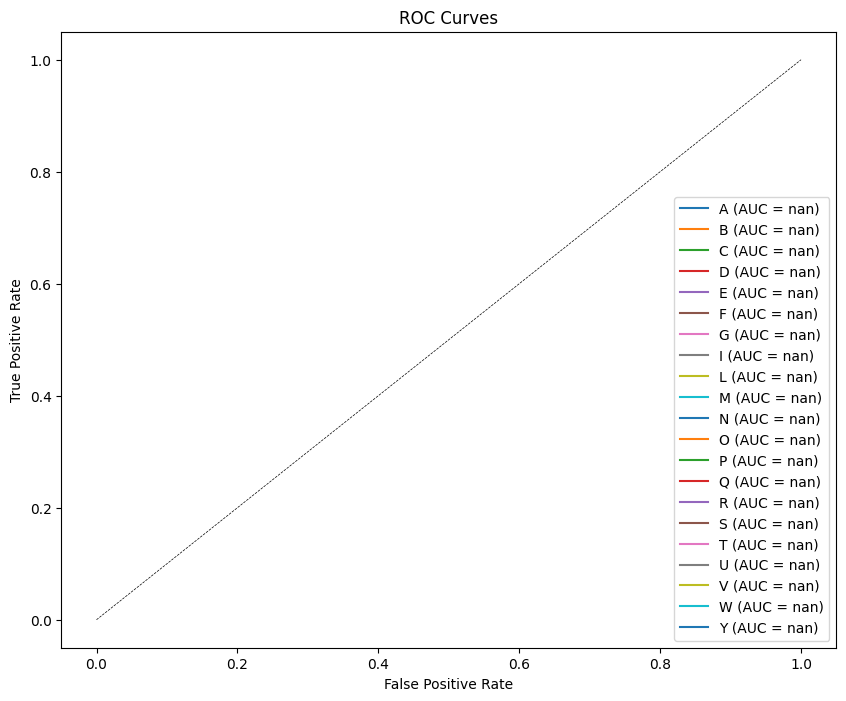

In [51]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = mlp_padrao_pca.predict_proba(x_teste_pca)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_padrao_pca, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_padrao_pca, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

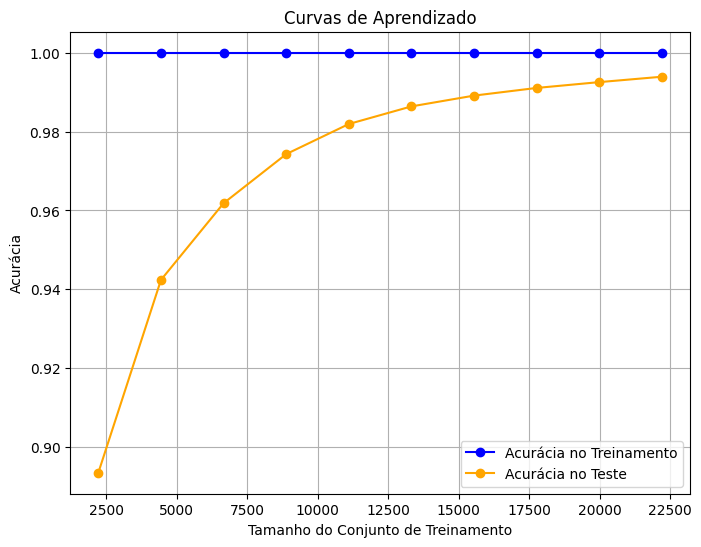

In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp_padrao_pca, x_treino_pca, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()